In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import tensorflow as tf

In [3]:
# Import Data.
# Data is divided into 3 sets. training, cross-validation and test
# Data is dumped into pickle dumps. 
# Data is of the format of a numpy array
# shape of the array is ('n', 3) where 'n' is the number of training/test samples. 
# Each row is a one-dim array of size 3. 
# data[:, 0] is the first feature
# data[:, 1] is the second feature
# data[:, 2] is the output value

# There are three classes in the data. The classes are specified using output values '0', '1' and '2'
# i.e. data[:, 2] belongs to the set {0,1,2}

# The problem is to build a neural network which can take in data and output the predicted class. 

In [4]:
# Import Data
trainData = pickle.load(open("data/trainData.pickle", "rb"))
validationData = pickle.load(open("data/validationData.pickle", "rb"))
testData = pickle.load(open("data/testData.pickle", "rb"))

In [5]:
# Helper method to plot the data. 
# Since there are only two features, it is possible to plot data in a x,y plot
def plotData(d):
    # plot class 0
    temp_data = d[d[:, 2] == 0]
    plt.scatter(temp_data[:,0], temp_data[:,1], marker = "v", s = 2)

    temp_data = d[d[:, 2] == 1]
    plt.scatter(temp_data[:,0], temp_data[:,1], marker = ".", s = 2)

    temp_data = d[d[:, 2] == 2]
    plt.scatter(temp_data[:,0], temp_data[:,1], marker = "x", s = 2)

    plt.show()


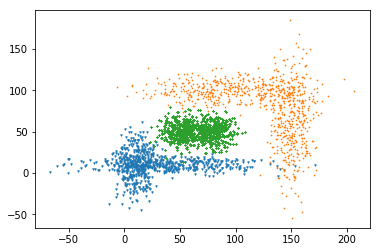

In [7]:
# Plot the training data
plotData(trainData)

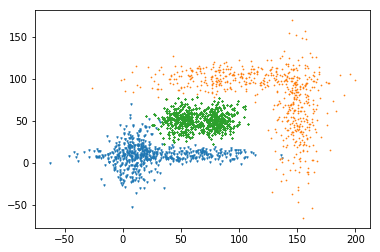

In [8]:
# Each color in the above plot denotes a different class. 
# Similarly the validation data looks like below
plotData(validationData)

In [9]:
# Create helper function to normalize data. Formula used for normalization (x - mean)/(std dev.)


In [10]:
def normalize_data(data):	
	x0_mean = np.mean(data[:, 0])
	x1_mean = np.mean(data[:, 1])
	x0_std = np.std(data[:, 0])
	x1_std = np.std(data[:, 1])
	temp_data = np.zeros((data.shape))
	temp_data[:, 0] = (data[:, 0] - x0_mean) / x0_std
	temp_data[:, 1] = (data[:, 1] - x1_mean) / x1_std

	return(temp_data)

In [11]:
# normalize the data. Remove the last column(the output values) and normalize the two features
xData = np.delete(trainData, 2, 1)
nData = normalize_data(xData)

In [12]:
# Helper function to create one-hot encoding
# In a neural network if there are more than 2 classes for classification then one-hot encoding is used
# to create distinct output values for them. 
# In our example since there are three classes the following three one-hot encodings are created 
# [1, 0, 0] ; [0, 1, 0] ; [0, 0, 1]

In [13]:
def one_hot(size, index):
	a = np.zeros(size)
	a[int(index)] = 1
	return a

In [14]:
# One hot encoding of training output
train_output = np.array([one_hot(3, x) for x in trainData[:, 2]])

In [15]:
# Create a neural network for training. The neural network will have only one input layer and one output layer. 

In [16]:
x = tf.placeholder(tf.float32, [None, 2])

W1 = tf.Variable(tf.truncated_normal([2,3], stddev = 0.1))
b1 = tf.Variable(tf.constant(0.1, shape = [3]))
y = tf.matmul(x, W1) + b1

In [17]:
# Define the loss and the optimizer

In [18]:
y_ = tf.placeholder(tf.float32, [None, 3])

In [19]:
cross_entropy = tf.reduce_mean(
	tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))

In [20]:
# Use adaptive gradient optimizer for adaptive gradient descent


In [21]:
train_step = tf.train.AdagradOptimizer(1).minimize(cross_entropy)

In [22]:
# Create a session for training

In [23]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

In [26]:
# create an empty array to store the loss values
loss_arr = np.empty([0])

for _ in range(5000):
    sess.run(train_step, feed_dict={x: nData, y_: train_output})
    # get value of Loss for checking convergence
    cross_entropy_val = sess.run([cross_entropy], feed_dict = {x: nData, y_: train_output})
    loss_arr = np.append(loss_arr, [cross_entropy_val])
    

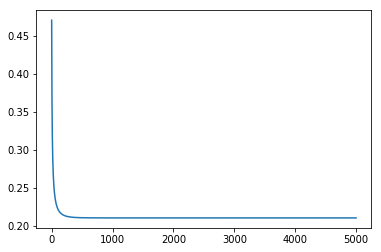

In [27]:
# plot the loss
plt.plot(loss_arr)
plt.show()

In [28]:
# Convergence takes place after around 500 iterations. 

In [29]:
# Measure classification accuracy

In [30]:
# output is classified in class 'c_i' if the maximum value of the output array has index i
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))

In [31]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [32]:
# Measure accuracy over validation data

In [33]:
validation_output = np.array([one_hot(3, x) for x in validationData[:, 2]])
vnData = normalize_data(np.delete(validationData, 2, 1))

In [34]:
print("Accuracy = %s "%sess.run(accuracy, feed_dict={x: vnData,
                                      y_: validation_output}))

Accuracy = 0.921667 


In [35]:
# 92% accuracy is good, however lets see if we can improve the accuracy by adding one additional hidden layer
# to the neural network



In [36]:
x = tf.placeholder(tf.float32, [None, 2])

W1 = tf.Variable(tf.truncated_normal([2,3], stddev = 0.1))
b1 = tf.Variable(tf.constant(0.1, shape = [3]))
y1 = tf.matmul(x, W1) + b1

In [37]:
# Apply sigmoid activation to the output of the input layer before they enter the hidden layer

In [38]:
y1_sig = tf.sigmoid(y1)

In [39]:
# Add the hidden layer
W2 = tf.Variable(tf.truncated_normal([3,3], stddev = 0.1))
b2 = tf.Variable(tf.constant(0.1, shape = [3]))

y = tf.matmul(y1_sig, W2) + b2

In [40]:
# Redefine the loss and the optimizer
y_ = tf.placeholder(tf.float32, [None, 3])

cross_entropy = tf.reduce_mean(
	tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))


In [41]:
train_step = tf.train.AdagradOptimizer(1).minimize(cross_entropy)

In [42]:
# start a new session
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

In [43]:
# create an empty array to store the loss values
loss_arr = np.empty([0])

for _ in range(5000):
    sess.run(train_step, feed_dict={x: nData, y_: train_output})
    # get value of Loss for checking convergence
    cross_entropy_val = sess.run([cross_entropy], feed_dict = {x: nData, y_: train_output})
    loss_arr = np.append(loss_arr, [cross_entropy_val])
    

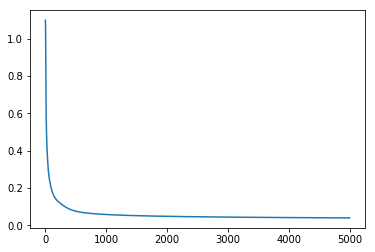

In [44]:
# plot the loss
plt.plot(loss_arr)
plt.show()

In [45]:
# Covergence in this case is relativly slower and takes place after around 1000 iterations

In [46]:
# Measure classification accuracy

In [47]:
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [48]:
validation_output = np.array([one_hot(3, x) for x in validationData[:, 2]])
vnData = normalize_data(np.delete(validationData, 2, 1))


In [49]:
print("Accuracy = %s "%sess.run(accuracy, feed_dict={x: vnData,
                                      y_: validation_output}))

Accuracy = 0.985 


In [50]:
# Significant improvement in accuracy by addition of one hidden layer